Part 1
1) To access performance of the popularity of the tops, we can look at the absolute values over time. However, without knowing more details on the "popularity score" given (for example profit margins, production capacities etc), absolute values may not be reflective of what the business wants. We also plot a month-on-month percentage growth chart to show relative performance.

We can see that:
    Top 2 has the highest popularity score on average followed by Top 3 and Top 1
    BUT
    Top 2 and Top 1 has the same growth rate, followed by Top 3
    HENCE
    Top 2 is the best performing top in terms of both absolute values and growth rate.


In [216]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

trend = pd.read_csv('trends1.csv')
pred = pd.read_csv('predictions.csv')


In [2]:
trend.describe()

,id,top 1,top 2,top 3
count,261.00000,261.000000,261.000000,261.000000
mean,130.00000,11.796935,36.233716,23.452107
std,75.48841,8.474904,26.619017,8.180336
min,0.00000,3.000000,9.000000,10.000000
25%,65.00000,4.000000,17.000000,16.000000
50%,130.00000,6.000000,22.000000,23.000000
75%,195.00000,20.000000,55.000000,29.000000
max,260.00000,29.000000,100.000000,43.000000


![](absval3.png)

![](percgrow.png)

In [23]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta


Part 1 Q2) Q3)

In [153]:
class perf:

    add_year = pd.to_timedelta(['365 D'])
    add_2year = pd.to_timedelta(['730 D'])

    def __init__(self, start_date, top):
        self.sd = start_date
        self.t = top

    def last_12m(self):

        df = pd.DataFrame(trend)
        trend['dated'] = pd.to_datetime(df['date'])   # no need to wrap in Series
        assert str(trend['dated'].dtype) == 'datetime64[ns]'
        df.index = trend['dated']
        date_inp = str(self.sd)
        compdate = pd.to_datetime(date_inp)

        cur_year = df[(compdate-add_year).format()[0]:pd.DatetimeIndex([compdate]).format()[0]]
        cur_year_perf = cur_year[self.t].reset_index().sum()[0]

        prev_year = df[(compdate-add_2year).format()[0]:(compdate-add_year).format()[0]]
        prev_year_perf = prev_year['top 1'].reset_index().sum()[0]

        print("the performance of the chose top is: " + str(cur_year_perf))

        return cur_year_perf, prev_year_perf

    def perf12_m(self):

        y1, y2 = self.last_12m()

        yoy = round(((y1-y2)/y2) * 100,2)

        atext = f"{self.t}"
        btext = f"{self.t}'s performance for the last 12 months is {yoy}%"

        d = dict()

        # d[atext] = ast.literal_eval(d[atext])
        # d[atext] = ast.literal_eval(btext)
        #d[f"{self.t}"] = f"{self.t}'s performance for the last 12 months is {yoy}%"
        d[atext] = btext
        # d2 = {eval(k):v for k, v in d.iteritems()}

        return d


In [160]:
p = perf('2017-07-07','top 2')
p.last_12m()

the performance of the chose top is: 3628


(3628, 1009)

In [161]:
p.perf12_m()

the performance of the chose top is: 3628


{'top 2': "top 2's performance for the last 12 months is 259.56%"}

Part 2
1) We plot a diagram for each of the fits for their respective tops. Visually, Fit1 consistently performs the worst, while Fit2 and Fit3 are too close to call. We perform a quantitative check by calculating the RMSE between Fit2 and Fit3 and select the one with lower error. Fit3 has lower error for all 3 tops hence Fit3 is the best forecast. Since prediction.csv has 1 year additional data, we ignore this extra data and only calculate the RMSE where dates can be paired.

2) We do not know the input features that allow us to come up with these predictions. Since Fit3 is the best, we should expect future performance based on what Fit3 predicts

![](fit1.png)

![](fit2.png)

![](fit3.png)

Part 2 Q3)

In [233]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [217]:
#dataframe setup
df2 = pd.DataFrame(pred)
df2['dated2'] = pd.to_datetime(df2['date'])
df2.index = df2['dated2']
df = pd.DataFrame(trend)
trend['dated'] = pd.to_datetime(df['date'])   # no need to wrap in Series
assert str(trend['dated'].dtype) == 'datetime64[ns]'
df.index = trend['dated']

#combine both dataframe to compare
#we drop nulls here because of gaps in the date
df3 = pd.concat([df2,df],axis=1).dropna(how='any',inplace=True)

In [261]:
fits_top1 = ['fit top 1', 'fit2 top 1', 'fit3 top 1']
true_top1 = df3['top 1']

fits_top2 = ['fit top 2', 'fit2 top 2', 'fit3 top 2']
true_top2 = df3['top 2']

fits_top3 = ['fit top 3', 'fit2 top 3', 'fit3 top 3']
true_top3 = df3['top 3']

In [392]:
#loop thru each fit to check RMSE
for i in fits_top1:
    print(math.sqrt(mean_squared_error(true_top1, df3[i])))

2.1492895395433984
1.778781112894933
1.7579881180738397


In [393]:
#loop thru each fit to check RMSE
for i in fits_top2:
    print(math.sqrt(mean_squared_error(true_top2, df3[i])))

8.334584010801953
4.403149324048552
3.6099141288889895


In [394]:
#loop thru each fit to check RMSE
for i in fits_top3:
    print(math.sqrt(mean_squared_error(true_top3, df3[i])))

2.9793270764604167
2.463782601754836
2.3682932922970577


In [231]:
#we can see that dates are tallied mostly weekly, but actually random. There are also some gaps in dates in trend1 dataset
compare_date = pd.DataFrame(pd.concat([df2['dated2'],df['dated']],axis=1))


,dated2,dated
2012-02-12,2012-02-12,2012-02-12
2012-04-11,2012-04-11,2012-04-11
2012-07-10,2012-07-10,2012-07-10
2012-09-12,2012-09-12,2012-09-12
2012-10-14,2012-10-14,2012-10-14
...,...,...
2017-11-24,2017-11-24,NaT
2017-11-25,2017-11-25,NaT
2017-11-26,2017-11-26,NaT
2017-11-27,2017-11-27,NaT


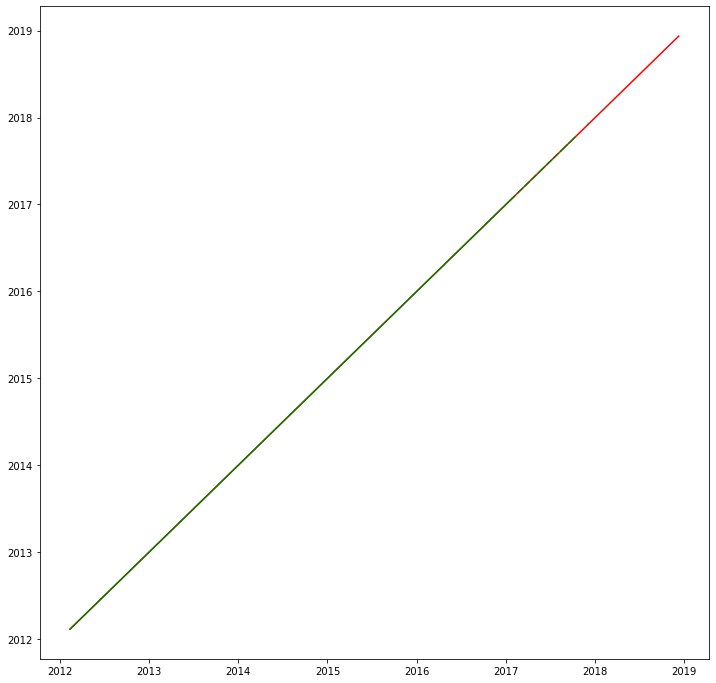

In [240]:
#visual of missing data
plt.figure(figsize=(12,12))
plt.plot(compare_date['dated2'], label = "line 1", color="red")

plt.plot(compare_date['dated'], label = "line 2", color='green')
plt.show()

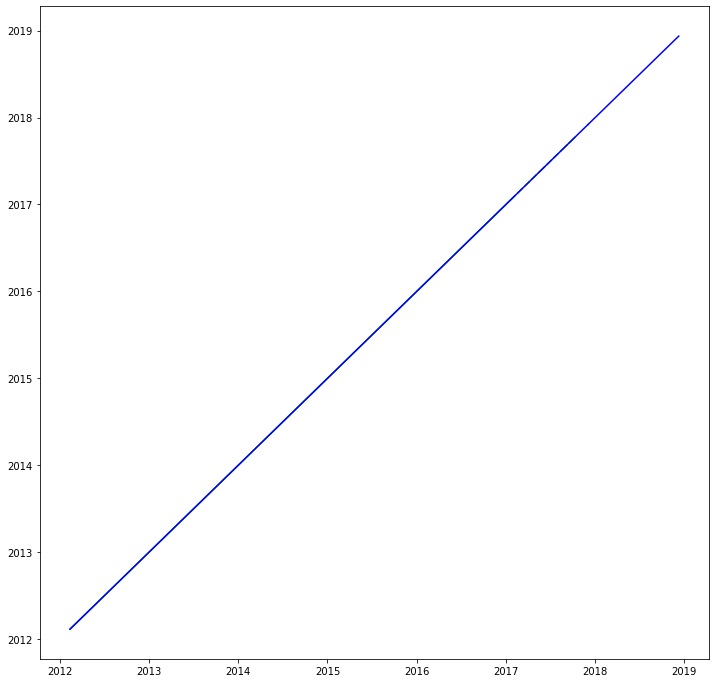

In [242]:
#vice versa, but we can see that dates from predictions.csv are complete
plt.figure(figsize=(12,12))
plt.plot(compare_date['dated'], label = "line 2", color='green')
plt.plot(compare_date['dated2'], label = "line 1", color="blue")


# plotting the line 2 points

plt.show()

3) For our prediction model, we shall try if the popularity of other tops affect our prediction. We use all of the fields in our combined dataset as inputs to predict popularity of top 3

In [352]:
#we drop date fields since its already indexed and sorted.
input =  df3.drop(columns=['date','id','dated','dated2'],axis=1)

# normalize the dataset

#scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.array(input)

# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

195 66


In [353]:
input

,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,top 1,top 2,top 3
2012-02-12,6.166446,10.646426,11.166618,13.826368,13.806094,14.497432,16.038504,5.980956,6.026818,4.0,17.0,15.0
2012-04-11,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650,4.0,12.0,12.0
2012-07-10,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028,4.0,14.0,14.0
2012-09-12,5.477106,9.139947,9.545315,12.095790,12.191429,13.047890,14.273965,5.250437,5.284335,3.0,14.0,10.0
2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460,7.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-24,20.156876,80.605019,31.834316,31.710922,31.538420,72.704354,69.048952,20.356717,20.354703,19.0,62.0,31.0
2017-10-09,19.393491,83.709639,34.626105,34.651718,34.573312,77.196136,74.388551,19.681597,19.664230,17.0,67.0,37.0
2017-11-06,19.169643,88.113491,39.883738,40.094869,40.390321,89.212601,92.374292,19.415301,19.499930,20.0,96.0,43.0
2017-12-02,22.551648,66.070423,31.430814,30.282384,29.790907,62.465646,60.880086,21.483273,21.503336,19.0,51.0,24.0


In [354]:
dataset

array([[ 6.16644588, 10.64642615, 11.16661778, ...,  4.        ,
        17.        , 15.        ],
       [ 4.20319287,  8.34508791, 10.55308227, ...,  4.        ,
        12.        , 12.        ],
       [ 6.46402028, 14.91837237, 12.85270016, ...,  4.        ,
        14.        , 14.        ],
       ...,
       [19.1696431 , 88.11349122, 39.88373787, ..., 20.        ,
        96.        , 43.        ],
       [22.55164845, 66.0704227 , 31.43081355, ..., 19.        ,
        51.        , 24.        ],
       [22.98429669, 73.49604518, 33.33139726, ..., 22.        ,
        72.        , 31.        ]])

In [295]:
train[1:7]

array([[0.03583471, 0.02565921, 0.05820186, 0.09998169, 0.07633524,
        0.03837495, 0.01326584, 0.00691818, 0.00836682, 0.03846154,
        0.03296703, 0.06060606],
       [0.137937  , 0.10308738, 0.13204186, 0.22191068, 0.18392832,
        0.15123801, 0.10318797, 0.11160641, 0.11324916, 0.03846154,
        0.05494505, 0.12121212],
       [0.0933665 , 0.03502204, 0.02584275, 0.03321596, 0.02897059,
        0.04028263, 0.04134039, 0.05130272, 0.04949173, 0.        ,
        0.05494505, 0.        ],
       [0.13527355, 0.10262902, 0.15156149, 0.22273408, 0.1898845 ,
        0.13209851, 0.0885758 , 0.10641158, 0.10759867, 0.15384615,
        0.06593407, 0.24242424],
       [0.09868536, 0.0777388 , 0.12074276, 0.177948  , 0.14885615,
        0.09608622, 0.05776272, 0.06971984, 0.07106455, 0.07692308,
        0.03296703, 0.15151515],
       [0.05177331, 0.0437812 , 0.07386496, 0.12199986, 0.09566947,
        0.05807996, 0.02606154, 0.02372368, 0.02539479, 0.07692308,
        0.06593407,

In [296]:
test = []
test.append(train[1:7])
test

[array([[0.03583471, 0.02565921, 0.05820186, 0.09998169, 0.07633524,
         0.03837495, 0.01326584, 0.00691818, 0.00836682, 0.03846154,
         0.03296703, 0.06060606],
        [0.137937  , 0.10308738, 0.13204186, 0.22191068, 0.18392832,
         0.15123801, 0.10318797, 0.11160641, 0.11324916, 0.03846154,
         0.05494505, 0.12121212],
        [0.0933665 , 0.03502204, 0.02584275, 0.03321596, 0.02897059,
         0.04028263, 0.04134039, 0.05130272, 0.04949173, 0.        ,
         0.05494505, 0.        ],
        [0.13527355, 0.10262902, 0.15156149, 0.22273408, 0.1898845 ,
         0.13209851, 0.0885758 , 0.10641158, 0.10759867, 0.15384615,
         0.06593407, 0.24242424],
        [0.09868536, 0.0777388 , 0.12074276, 0.177948  , 0.14885615,
         0.09608622, 0.05776272, 0.06971984, 0.07106455, 0.07692308,
         0.03296703, 0.15151515],
        [0.05177331, 0.0437812 , 0.07386496, 0.12199986, 0.09566947,
         0.05807996, 0.02606154, 0.02372368, 0.02539479, 0.07692308,
  

In [418]:

# helper function to arrange dates into a "long" array
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), -1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

In [456]:
#we use 1 previous days to predict future popularity

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [457]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [458]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
193/193 - 1s - loss: 466.8296 - 1s/epoch - 6ms/step
Epoch 2/100
193/193 - 0s - loss: 441.3298 - 178ms/epoch - 922us/step
Epoch 3/100
193/193 - 0s - loss: 427.8965 - 161ms/epoch - 834us/step
Epoch 4/100
193/193 - 0s - loss: 415.2624 - 170ms/epoch - 881us/step
Epoch 5/100
193/193 - 0s - loss: 403.0665 - 173ms/epoch - 897us/step
Epoch 6/100
193/193 - 0s - loss: 391.2570 - 167ms/epoch - 865us/step
Epoch 7/100
193/193 - 0s - loss: 379.7727 - 168ms/epoch - 871us/step
Epoch 8/100
193/193 - 0s - loss: 368.5584 - 182ms/epoch - 943us/step
Epoch 9/100
193/193 - 0s - loss: 357.6526 - 165ms/epoch - 855us/step
Epoch 10/100
193/193 - 0s - loss: 347.0042 - 165ms/epoch - 855us/step
Epoch 11/100
193/193 - 0s - loss: 327.1970 - 166ms/epoch - 860us/step
Epoch 12/100
193/193 - 0s - loss: 273.9726 - 167ms/epoch - 865us/step
Epoch 13/100
193/193 - 0s - loss: 231.1500 - 161ms/epoch - 834us/step
Epoch 14/100
193/193 - 0s - loss: 190.3041 - 155ms/epoch - 803us/step
Epoch 15/100
193/193 - 0s - loss: 

In [459]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.70 RMSE
Test Score: 7.58 RMSE


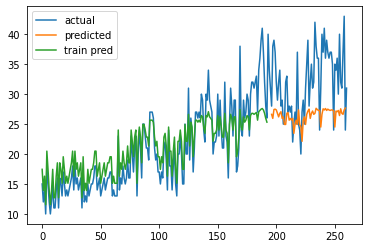

In [460]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

yshift = np.empty_like(dataset)
yshift[:, :] = np.nan
yshift[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 0] = testY


plt.plot(dataset[:,-1],label='actual')
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)

#plt.plot(yshift)
plt.plot(testPredictPlot[:,-1],label='predicted')

#plt.plot(trainY)
plt.plot(np.concatenate(trainPredict),label='train pred')
plt.legend()
plt.show()

4) With the additional features creating noise, RMSE during training suffers. And as as expected, without higher impact inputs, our model will not perform as well as the fits given. Given that the model only predicts future popularity based on the popularity of the day before, once the model starts to predict for the holdout set the variance will be low and the model will be meaningless.